In [29]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# read in all the words
words = open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [31]:
len(words)

32033

In [32]:
# build the vocabulary of chars and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [33]:
# build the dataset

block_size = 3 # context length
X,Y = [], []
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '---->',itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)


In [34]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [63]:
# build the dataset

def build_dataset(words):
  block_size = 3 # context length
  X,Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '---->',itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [35]:
C = torch.randn((27,2))

In [36]:
C

tensor([[-0.3000,  0.5665],
        [-0.1584,  0.7147],
        [-1.0575, -0.6863],
        [-0.2347, -0.0774],
        [-1.9478, -1.7948],
        [-1.2192,  0.1785],
        [ 0.9665, -0.1737],
        [-0.8853, -1.5142],
        [ 1.1927,  0.3037],
        [-0.9000, -0.6891],
        [ 1.0524,  0.8709],
        [-0.1685,  0.7538],
        [ 0.4300,  2.0364],
        [-0.3813, -0.8304],
        [ 0.3169,  1.2293],
        [ 1.9079,  0.7650],
        [ 0.5125,  1.2387],
        [-0.4317, -0.5268],
        [ 0.2968,  0.7343],
        [ 1.4467,  1.0759],
        [-1.1527, -0.1468],
        [-0.9309,  1.6634],
        [ 2.4929, -2.1036],
        [ 1.1076, -0.8224],
        [ 0.6847, -0.2663],
        [ 0.0621,  0.4323],
        [ 0.5297,  1.0473]])

In [37]:
C[X]

tensor([[[-0.3000,  0.5665],
         [-0.3000,  0.5665],
         [-0.3000,  0.5665]],

        [[-0.3000,  0.5665],
         [-0.3000,  0.5665],
         [-1.2192,  0.1785]],

        [[-0.3000,  0.5665],
         [-1.2192,  0.1785],
         [-0.3813, -0.8304]],

        ...,

        [[ 0.5297,  1.0473],
         [ 0.5297,  1.0473],
         [ 0.0621,  0.4323]],

        [[ 0.5297,  1.0473],
         [ 0.0621,  0.4323],
         [ 0.5297,  1.0473]],

        [[ 0.0621,  0.4323],
         [ 0.5297,  1.0473],
         [ 0.6847, -0.2663]]])

In [38]:
C[X].shape

torch.Size([228146, 3, 2])

In [39]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [40]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [41]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [42]:
h

tensor([[-0.9776, -0.8448,  0.9816,  ..., -0.7062, -0.8255, -0.7980],
        [-0.9842, -0.9782,  0.5161,  ..., -0.8306, -0.7986, -0.6137],
        [ 0.6673, -0.9595,  0.9972,  ...,  0.6065, -0.9911, -0.6244],
        ...,
        [-0.8840,  0.2325,  0.9447,  ..., -0.9884,  0.4279,  0.5164],
        [-0.7428, -0.5666,  0.9850,  ..., -0.8964, -0.2518, -0.7029],
        [-0.6542,  0.8284,  0.9975,  ..., -0.9475,  0.2098,  0.4897]])

In [43]:
h.shape

torch.Size([228146, 100])

In [44]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [45]:
logits = h @ W2 + b2

In [46]:
logits.shape

torch.Size([228146, 27])

In [47]:
counts = logits.exp()

In [48]:
prob = counts/counts.sum(1,keepdims=True)

In [49]:
prob.shape

torch.Size([228146, 27])

In [51]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [52]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [53]:
prob[0,5]

tensor(6.5089e-10)

In [55]:
## Now in a structured way

In [56]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [103]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,200),generator=g)
b1 =torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2]

In [104]:
sum(p.nelement() for p in parameters) # Number of parameters in total

11897

In [105]:
for p in parameters:
  p.requires_grad = True

In [68]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [106]:
lri = []
lossi = []
stepi = []

In [118]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32,100)
  logits = h @ W2 + b2 # (32,27)
  # counts = logits.exp()
  # prob = counts/counts.sum(1,keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits,Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.162815570831299


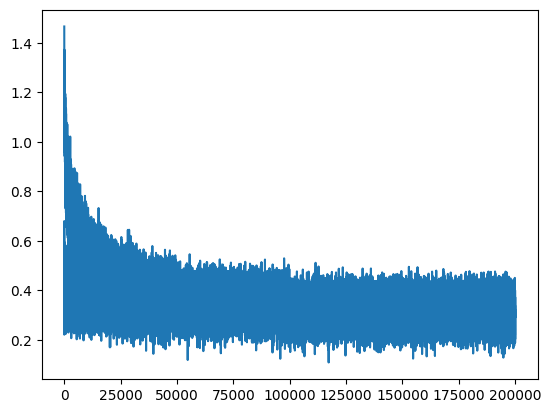

In [119]:
plt.plot(stepi,lossi)

In [120]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.1113, grad_fn=<NllLossBackward0>)

In [121]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1503, grad_fn=<NllLossBackward0>)

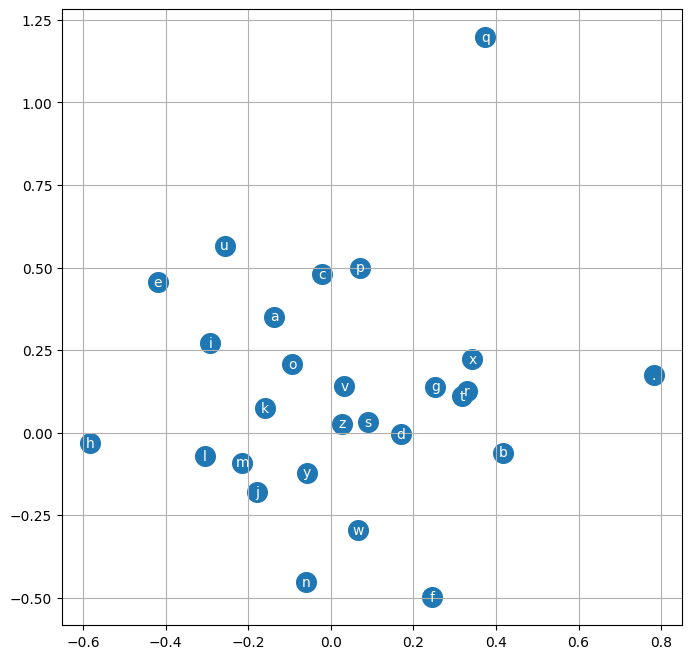

In [122]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [123]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

carpaheam.
jhavi.
kimri.
reh.
casparshier.
zheen.
deliah.
jarqui.
ner.
kia.
chaiir.
kaleigh.
ham.
jorn.
quint.
sulin.
alianni.
wanell.
dearisika.
jenni.
